# Разведочный анализ данных (Duckdb + Pandas + Matplotlib + Sns)

## Оглавление:
* [Предварительная обработка данных](#first-bullet)
* [Агрегация данных](#second-bullet)

In [82]:
import duckdb as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [71]:
%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
data = pd.read_csv('/Users/dmitrii/Downloads/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [4]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Предварительная обработка данных <a class="anchor" id="first-bullet"></a>

### Анализ пропущенных значений

<AxesSubplot:>

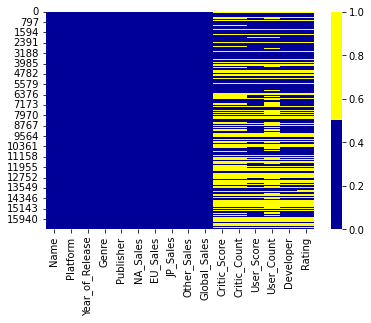

In [37]:
# определяем цвета: желтый - пропущенные данные, синий - нет
colours = ['#000099', '#ffff00'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

In [84]:
for i in data.columns:
    missing = np.mean(data[i].isnull())
    print('{} - {}%'.format(i, round(missing*100)))

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
Publisher - 0%
NA_Sales - 0%
EU_Sales - 0%
JP_Sales - 0%
Other_Sales - 0%
Global_Sales - 0%
Critic_Score - 51%
Critic_Count - 51%
User_Score - 40%
User_Count - 55%
Developer - 40%
Rating - 40%


created missing indicator for: Name
created missing indicator for: Year_of_Release
created missing indicator for: Genre
created missing indicator for: Publisher
created missing indicator for: Critic_Score
created missing indicator for: Critic_Count
created missing indicator for: User_Score
created missing indicator for: User_Count
created missing indicator for: Developer
created missing indicator for: Rating


<AxesSubplot:xlabel='index'>

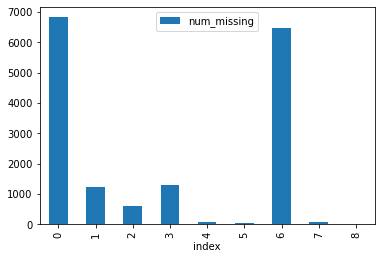

In [85]:
for i in data.columns:
    missing = data[i].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(i))
        data['{}_ismissing'.format(i)] = missing


ismissing_cols = [i for i in data.columns if 'ismissing' in i]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [86]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Year_of_Release_ismissing,Genre_ismissing,Publisher_ismissing,Critic_Score_ismissing,Critic_Count_ismissing,User_Score_ismissing,User_Count_ismissing,Developer_ismissing,Rating_ismissing,num_missing
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,False,False,False,False,False,False,False,False,False,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,False,False,False,True,True,True,True,True,True,6
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,False,False,False,False,False,False,False,False,False,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,False,False,False,False,False,False,False,False,False,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,False,False,False,True,True,True,True,True,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,...,False,False,False,True,True,True,True,True,True,6
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,...,False,False,False,True,True,True,True,True,True,6
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,...,False,False,False,True,True,True,True,True,True,6
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,...,False,False,False,True,True,True,True,True,True,6


### Что делать с пропущенными значениями?

#### Удалять

In [ ]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
# отбрасываем столбцы с большим количеством пропусков
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

#### Заменять недостающие значения на медиану / моду / среднее

In [ ]:
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

#### Замена недостающих значений на "индикатор"

In [ ]:
# категориальные признаки
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# численные признаки
df['life_sq'] = df['life_sq'].fillna(-999)

### Сильно отклоняющиеся от "нормы" значения

In [ ]:
# ящик с усами / гистограмма

In [ ]:
# описательная статистика
df['life_sq'].describe()

In [ ]:
# столбчатая диаграмма для категориальных признаков

In [ ]:
# z-оценка

### Неинформативные признаки

In [ ]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

### Дубликаты

In [ ]:
# отбрасываем неуникальные строки
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)

### Работа с форматами данных

In [ ]:
# приведение к нижнему регистру
df['sub_area'].value_counts(dropna=False)
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

In [ ]:
# приведение даты к удобному для нас формату

In [ ]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

### Идентифицируем опечатки

In [ ]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex


msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

# Агрегация данных <a class="anchor" id="second-bullet"></a>

In [6]:
con = db.connect()

In [7]:
con.execute("SELECT * FROM data").df()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sql_data = con.execute("SELECT * FROM data").df()

In [9]:
type(sql_data)

pandas.core.frame.DataFrame

### Самые продаваемые игры в разрезе года их релиза (выпуска)

In [17]:
sales_by_year_of_release = con.execute("""SELECT Year_of_Release, 
                      SUM(Global_sales) as Sales 
               FROM data GROUP BY Year_of_Release
               HAVING Year_of_Release>0
               ORDER BY Sales DESC""").df()

In [18]:
sales_by_year_of_release[0:5]

,Year_of_Release,Sales
0,2008.0,671.79
1,2009.0,658.88
2,2007.0,605.37
3,2010.0,590.59
4,2006.0,518.22


<BarContainer object of 39 artists>

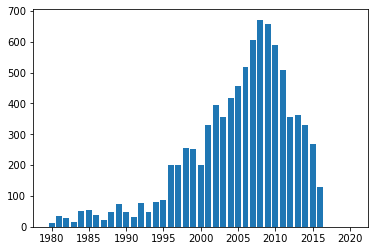

In [19]:
fig, ax = plt.subplots()
ax.bar(sales_by_year_of_release['Year_of_Release'], sales_by_year_of_release['Sales'])

### Анализ продаваемых игр по жанрам

In [77]:
%%sql 
popular_genre <<
SELECT Genre, Count(*) AS qty, SUM(Global_Sales) AS sales, (SUM(Global_Sales)/Count(*))*1000 AS spg
FROM data
WHERE Genre NOT NULL
GROUP BY Genre
ORDER BY qty DESC

Returning data to local variable popular_genre


In [78]:
popular_genre

,Genre,qty,sales,spg
0,Action,3370,1745.27,517.884273
1,Sports,2348,1332.00,567.291312
2,Misc,1750,803.18,458.960000
3,Role-Playing,1500,934.40,622.933333
4,Shooter,1323,1052.94,795.873016
5,Adventure,1303,237.69,182.417498
6,Racing,1249,728.90,583.586869
7,Platform,888,828.08,932.522523
8,Simulation,874,390.42,446.704805
9,Fighting,849,447.48,527.067138


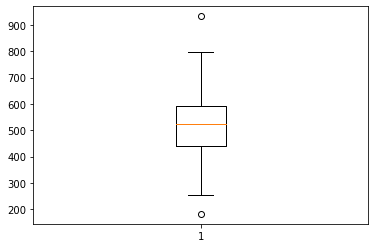

In [79]:
plt.boxplot(popular_genre['spg'])
plt.show()

### Самая популярная игра по объему продаж в разных регионах

In [53]:
con.execute("""
SELECT Name, NA_Sales as Sales, 'NA' as Region FROM data
WHERE NA_Sales = (SELECT MAX(NA_Sales) FROM data)
UNION
SELECT Name, EU_Sales, 'EU' FROM data
WHERE EU_Sales = (SELECT MAX(EU_Sales) FROM data)
UNION
SELECT Name, JP_Sales, 'JP' FROM data
WHERE JP_Sales = (SELECT MAX(JP_Sales) FROM data)
UNION
SELECT Name, Other_Sales, 'Other' FROM data
WHERE Other_Sales = (SELECT MAX(Other_Sales) FROM data)
""").df()

,Name,Sales,Region
0,Wii Sports,41.36,NA
1,Wii Sports,28.96,EU
2,Pokemon Red/Pokemon Blue,10.22,JP
3,Grand Theft Auto: San Andreas,10.57,Other


### Самая популярная платформа

In [60]:
con.execute("""
SELECT Platform, SUM(Global_sales) as Sales FROM data
GROUP BY Platform
ORDER BY Sales DESC
LIMIT 5
""").df()

,Platform,Sales
0,PS2,1255.64
1,X360,971.63
2,PS3,939.43
3,Wii,908.13
4,DS,807.10


In [72]:
%%sql
SELECT Platform, SUM(Global_sales) as Sales FROM data
GROUP BY Platform
ORDER BY Sales DESC
LIMIT 5

,Platform,Sales
0,PS2,1255.64
1,X360,971.63
2,PS3,939.43
3,Wii,908.13
4,DS,807.10
